<a href="https://colab.research.google.com/github/tjwei/NDHU_AM1130/blob/master/sklearn_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets

In [0]:
# 取出 iris 資料集
iris = datasets.load_iris()

In [0]:
from sklearn.svm import SVC

In [0]:
# SVM 分類器
clf = SVC()

In [70]:
# 先只用其中兩個 feature (1,3)
X = iris['data'][:, [1,3]]
y = iris['target']
# 訓練分類器
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
clf.predict(X[:1])

array([0])

In [72]:
clf.predict([ [5.2, 3.5] ])

array([2])

In [73]:
(clf.predict(X) == y).mean()

0.96

In [0]:
import numpy as np
h =0.01
# create a mesh to plot in
# 找出資料的範圍
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# 建構網格點
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [0]:
#np.stack([xx.ravel(), yy.ravel()], axis=1)
# 網格點用來窮舉各種 feature 的組合
feature_grid = np.array([xx.ravel(), yy.ravel()]).T

In [0]:
# 預測出來的值
Z = clf.predict(feature_grid)

In [0]:
# 改變形狀,能畫在平面上
Z = Z.reshape(xx.shape)

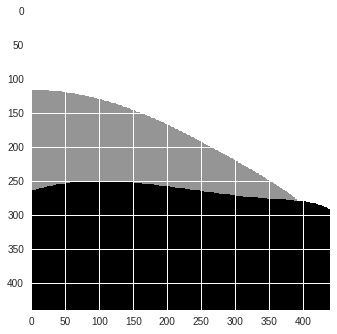

In [78]:
import matplotlib.pyplot as plt
plt.imshow(Z)

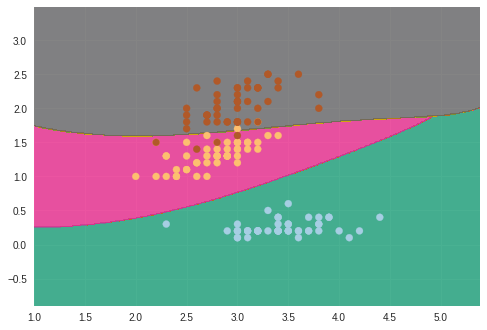

In [79]:
# 邊界範圍
plt.contourf(xx, yy, Z, cmap=plt.cm.Dark2  , alpha=0.8)
# 資料小點
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)